<a href="https://colab.research.google.com/github/NehaVNayak/Infosys_AirQuality_September_2025_Neha/blob/main/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# ✅ Install required libraries (run once)
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [6]:
# ✅ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plotting style
sns.set(style="whitegrid")


In [13]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

for file_name in uploaded.keys():
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_name, sep=';', decimal=',', encoding='utf-8', low_memory=False)
    elif file_name.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_name)
    else:
        raise ValueError("Unsupported file format! Please upload a .csv or .xlsx file.")

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx
✅ Dataset Loaded Successfully!
Shape: (9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [14]:
# ✅ Basic info
print("\nDataset Info:")
print(df.info())

# ✅ Missing values
print("\nMissing Values:\n", df.isnull().sum())

# ✅ Descriptive stats
df.describe()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: dat

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


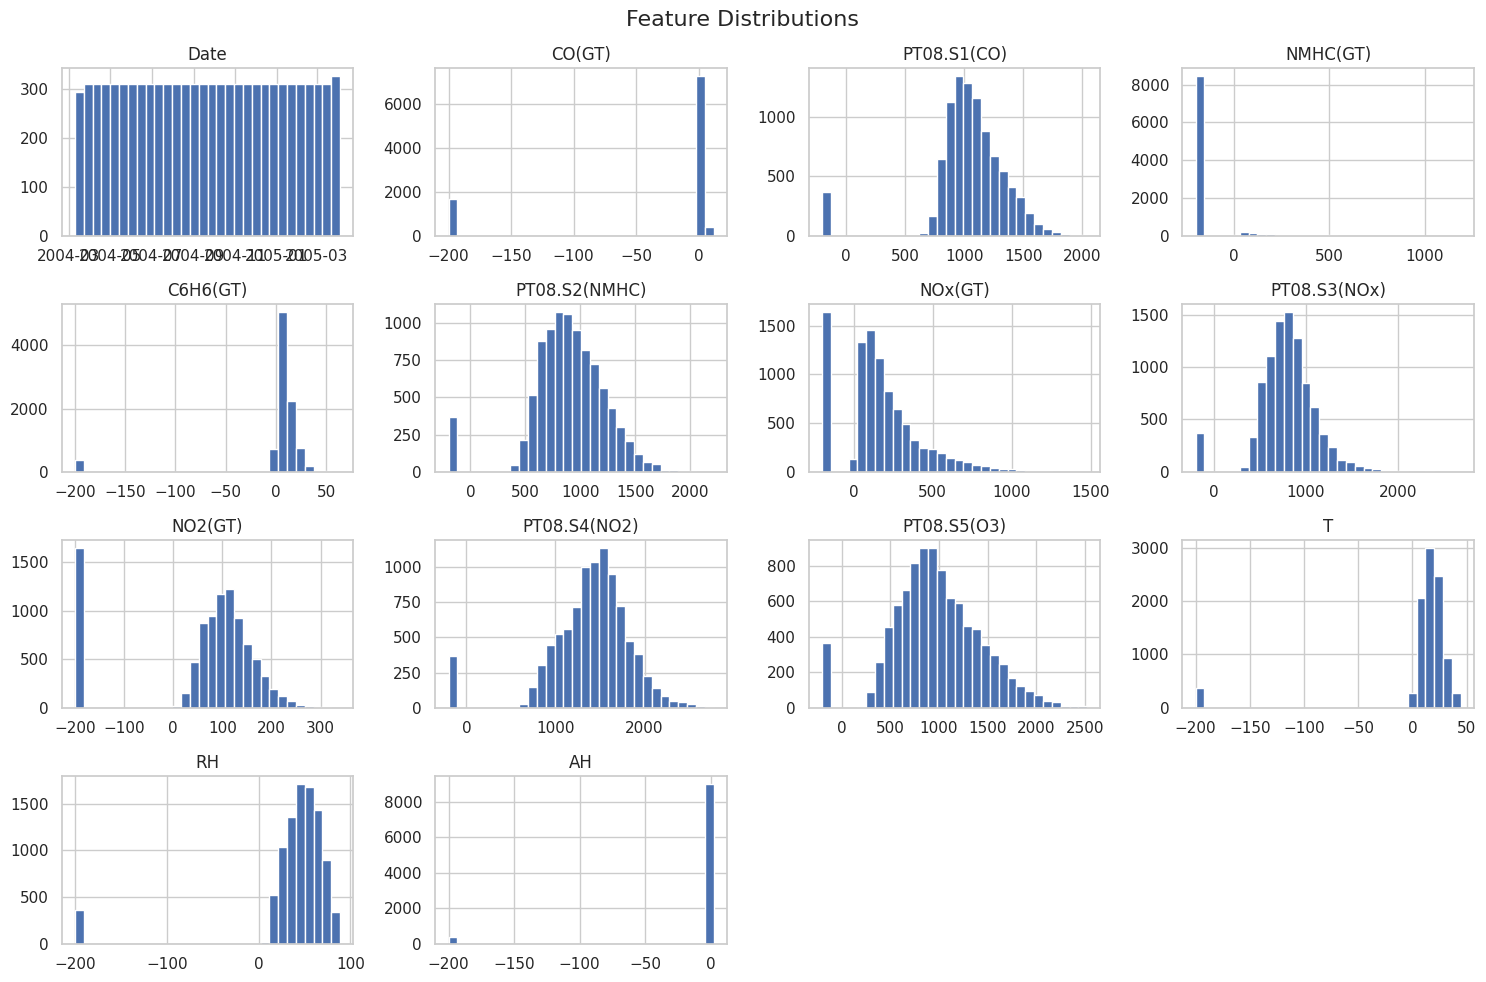

In [15]:
# ✅ Numeric distributions
df.hist(figsize=(15,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


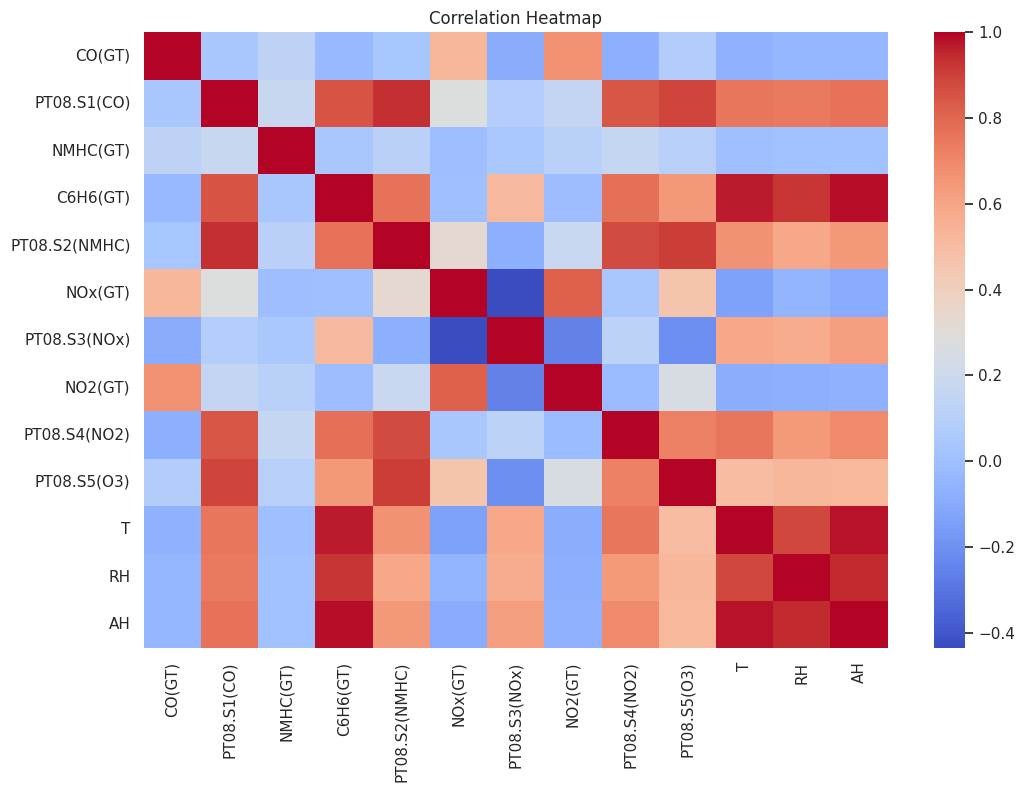

In [16]:
# ✅ Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# ✅ Drop columns with too many missing values (>50%)
df = df.dropna(axis=1, thresh=len(df)*0.5)

# ✅ Fill remaining missing values with median
df = df.fillna(df.median(numeric_only=True))

# ✅ Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Categorical data converted to numeric successfully!")


✅ Categorical data converted to numeric successfully!


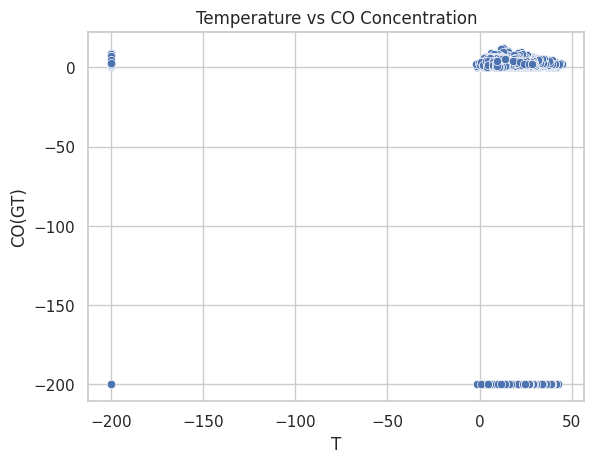

In [18]:
# ✅ Example visualization (Temperature vs CO)
if 'T' in df.columns and 'CO(GT)' in df.columns:
    sns.scatterplot(x='T', y='CO(GT)', data=df)
    plt.title("Temperature vs CO Concentration")
    plt.show()


In [19]:
# ✅ Choose a target variable (predicting CO(GT))
target = 'CO(GT)' if 'CO(GT)' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

# ✅ Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (7485, 14) | Test shape: (1872, 14)


In [21]:
# ✅ Remove datetime columns (they can’t be scaled)
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
if len(datetime_cols) > 0:
    print("Dropping datetime columns:", list(datetime_cols))
    X_train = X_train.drop(columns=datetime_cols)
    X_test = X_test.drop(columns=datetime_cols)

# ✅ Convert any remaining non-numeric columns to numeric (safety)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# ✅ Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# ✅ Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² :", r2_score(y_test, y_pred_lr))



Dropping datetime columns: ['Date']
Linear Regression Results:
MAE: 33.382710803763786
MSE: 2857.0286320866862
R² : 0.5164234596446271


In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² :", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 17.902315862843476
MSE: 1668.0223162529492
R² : 0.7176729515867579


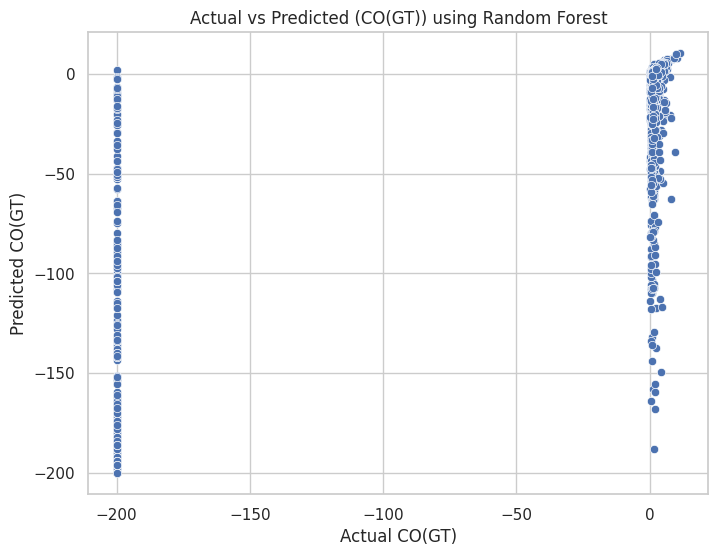

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual " + target)
plt.ylabel("Predicted " + target)
plt.title("Actual vs Predicted (" + target + ") using Random Forest")
plt.show()
